In [1]:
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import latex

from Viterbi import *

In [2]:
# Generators for Convolutional Codes

# Redundancy generators
generators = [[1,1,1],[1,0,1]]

# Bit receiver
# From index 0 corresponds to [x[n], x[n-1], x[n-2]]


bits_in = [1,1,0,1,0,0,1]

# Finite State Machine descripted for convolutional codes
FSM = [[0b00, None, 0b11, None],
       [0b11, None, 0b00, None],
       [None, 0b10, None, 0b01],
       [None, 0b01, None, 0b10]]

In [3]:
# Testbench

# 1. by input bit from 1 to 32
iter  = 1000
p     = 0.05

path = 'testbench/'
filename = 'test'
ext = '.csv'

# createFolder(path)
accu_lst = []
accu_lst2 = []
for n in range(1,33):
    n_err  = 0
    n_err2 = 0
    f = open(path + filename + str(n) + ext,'w',newline='')
    wr = csv.writer(f)
    wr.writerow(['No.','Input','Tx','Rx','Decoded','Error','Error on last two'])
    for i in range(iter):
        bits_in = list(np.random.randint(2, size = n))
        bits_in = bits_in + [0,0]
        tx = encode(bits_in, generators)
        rx = bsc(tx, p)
        decoded, error = viterbi(rx, FSM)
        if bits_in != decoded:
            n_err = n_err + 1
            # add error case to new line of csv file
            if np.inner(decoded[-2:],[1,1]) > 0:
                n_err2 = n_err2 + 1
                wr.writerow([n_err,bits_in,tx,rx,decoded,error,1])
            else:
                wr.writerow([n_err,bits_in,tx,rx,decoded,error,0])
        # if (i+1) % 100 == 0:
        #     print("%d-th iteration test complete." % (i+1))
    print("%d-bit test complete." % n)
    
    accuracy = n_err / iter
    print("Number of error =", n_err)
    print("Number of error in last two =", n_err2)
    print("Accuracy =", accuracy)
    print()
    
    wr.writerow(["Iteration time = {0}, n_err = {1}, n_err2 = {2}, Accuracy = {3}".format(iter,n_err,n_err2,accuracy)])
    
    accu_lst.append(accuracy)
    accu_lst2.append(n_err2/iter)



1-bit test complete.
Number of error = 18
Number of error in last two = 18
Accuracy = 0.018

2-bit test complete.
Number of error = 22
Number of error in last two = 19
Accuracy = 0.022

3-bit test complete.
Number of error = 28
Number of error in last two = 27
Accuracy = 0.028

4-bit test complete.
Number of error = 21
Number of error in last two = 18
Accuracy = 0.021

5-bit test complete.
Number of error = 27
Number of error in last two = 19
Accuracy = 0.027

6-bit test complete.
Number of error = 34
Number of error in last two = 27
Accuracy = 0.034

7-bit test complete.
Number of error = 29
Number of error in last two = 18
Accuracy = 0.029

8-bit test complete.
Number of error = 36
Number of error in last two = 25
Accuracy = 0.036

9-bit test complete.
Number of error = 52
Number of error in last two = 32
Accuracy = 0.052

10-bit test complete.
Number of error = 44
Number of error in last two = 25
Accuracy = 0.044

11-bit test complete.
Number of error = 57
Number of error in last tw

In [4]:
# Setting plt parameters
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern Serif",

})

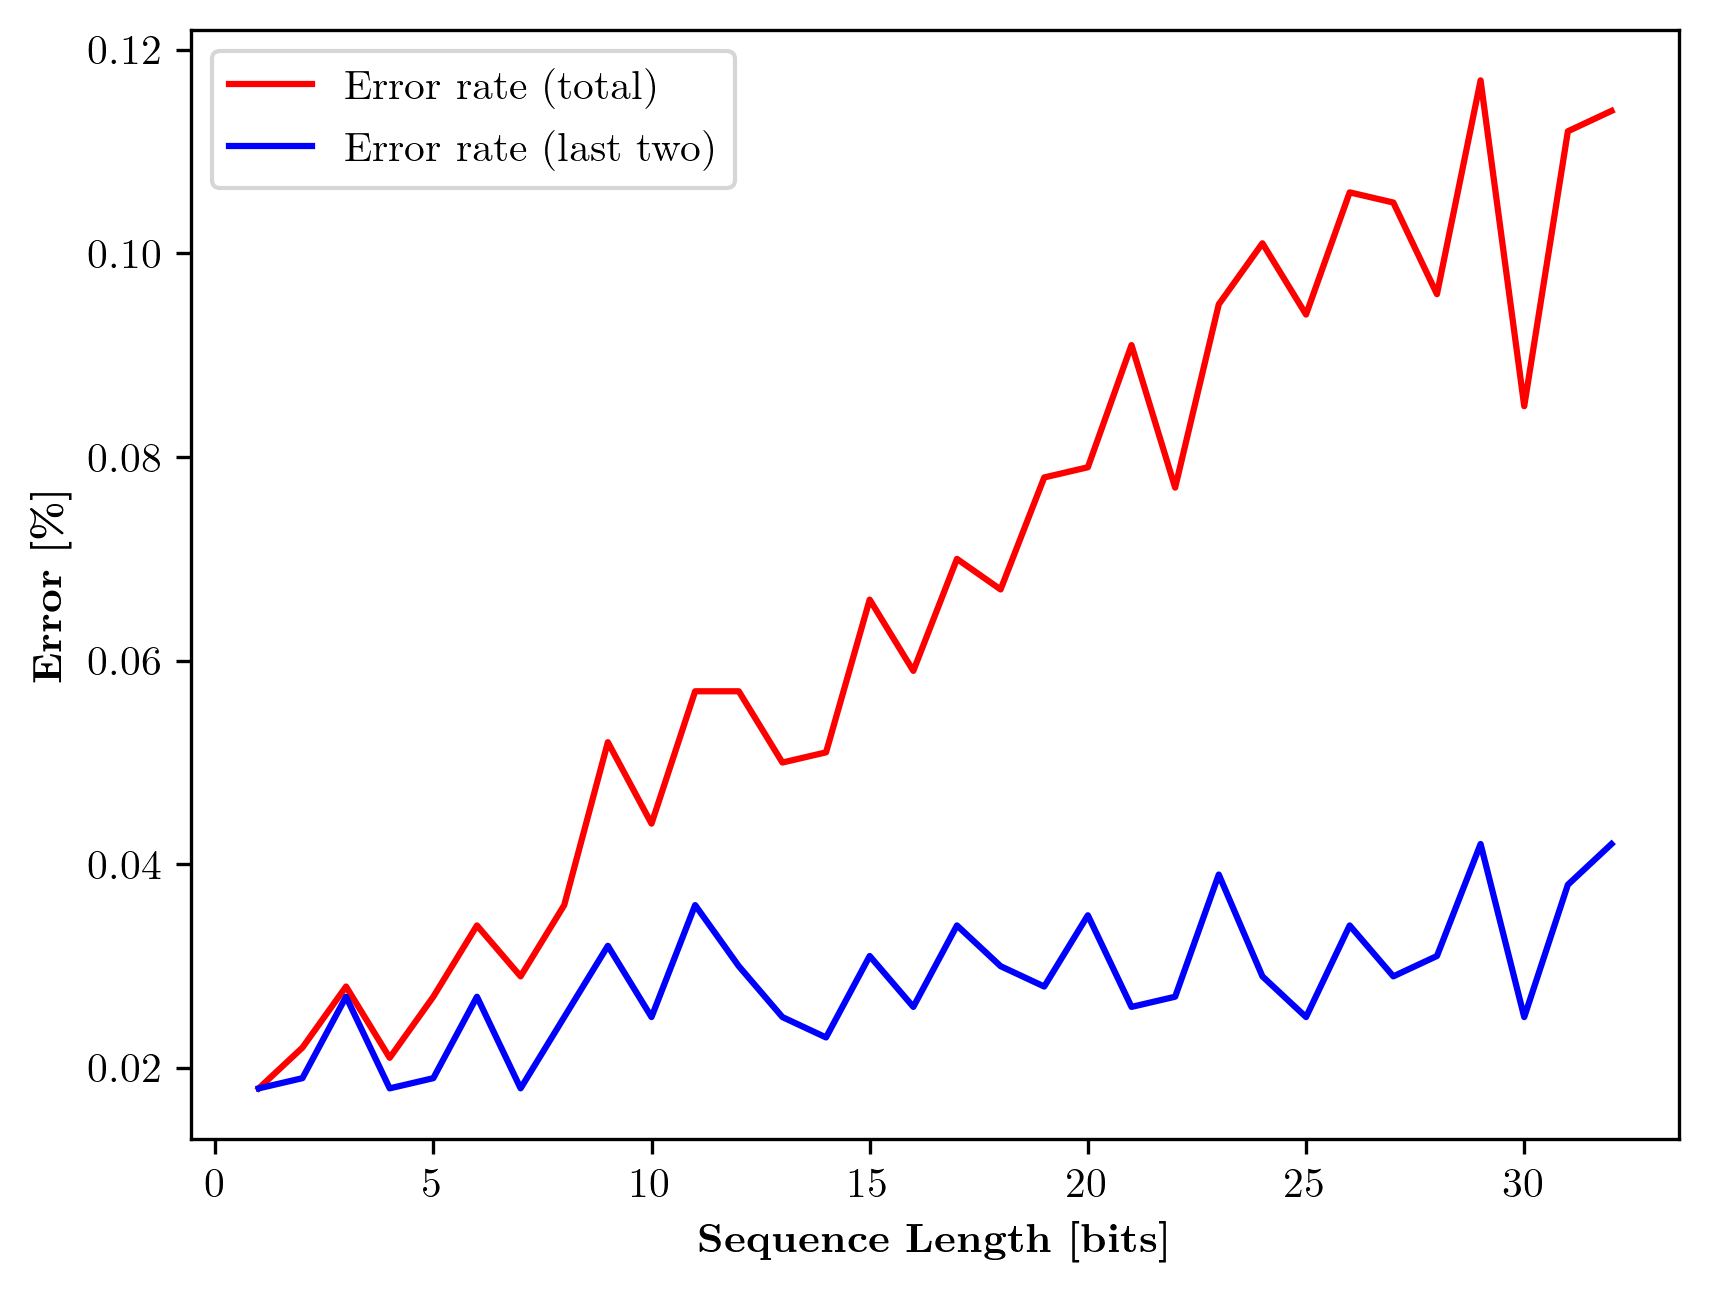

In [5]:
fig = plt.figure(dpi=300)

plt.plot(range(1,33), accu_lst,'r', label='Error rate (total)')
plt.plot(range(1,33), accu_lst2,'b', label='Error rate (last two)')

plt.xlabel(r'\textbf{Sequence Length [bits]}', weight='bold')
plt.ylabel(r'\textbf{Error [\%]}', weight='bold')
plt.legend()

plt.show()